In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow import keras

In [5]:
keras.__version__

'2.6.0'

In [6]:
tf.__version__

'2.6.0'

In [7]:
#Importing Dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


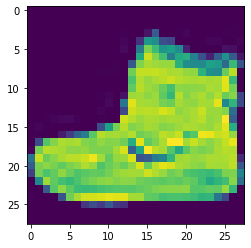

In [8]:
plt.imshow(x_train_full[0]) #Accessing first image

In [9]:
class_names=["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train_full[1]]

'T-shirt/top'

In [10]:
#Data Normalisation
x_train_n=x_train_full/255.    #Normalisisng pixel intensity
x_test_n=x_test/255.

In [11]:
x_valid,x_train=x_train_n[:5000],x_train_n[5000:]    #0-5000 in validation set,5000-60000 in train set
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test_n

In [12]:
#Replicate the same result everytime
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #Input Layer [28X28 pixels]
model.add(keras.layers.Dense(300,activation="relu")) #RELU is prefered in hidden layers in classification model
model.add(keras.layers.Dense(100,activation="relu")) #2 hidden layers, 100 and 300 are number of neurons
model.add(keras.layers.Dense(10,activation="softmax")) #Softmax activation in o/p

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


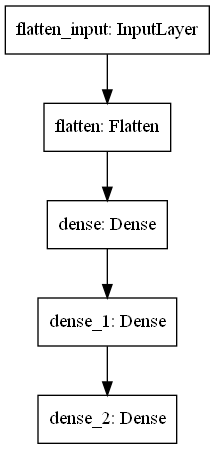

In [17]:
import pydot
keras.utils.plot_model(model)

In [18]:
weights,biases = model.layers[1].get_weights()

In [19]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [20]:
#Compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [23]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5332 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4125 - accuracy: 0.8564 - val_loss: 0.3917 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3942 - accuracy: 0.8617 - val_loss: 0.3752 - val_accuracy: 0.8688
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3754 - accuracy: 0.8676 - val_loss: 0.3715 - val_accuracy: 0.8726
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3635 - accuracy: 0.8713 - val_loss: 0.3620 - val_accuracy:

In [24]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [25]:
model_history.history

{'loss': [0.7236780524253845,
  0.48432329297065735,
  0.43926575779914856,
  0.41254061460494995,
  0.39415401220321655,
  0.37537190318107605,
  0.3634667992591858,
  0.3519733250141144,
  0.34173864126205444,
  0.3324226140975952,
  0.32434672117233276,
  0.315105140209198,
  0.3082481324672699,
  0.30250445008277893,
  0.29487884044647217,
  0.28935888409614563,
  0.2840943932533264,
  0.2781604528427124,
  0.2729814350605011,
  0.2674770653247833,
  0.26250433921813965,
  0.2576865255832672,
  0.253560870885849,
  0.24866965413093567,
  0.24443283677101135,
  0.24068966507911682,
  0.23636707663536072,
  0.23279036581516266,
  0.22856011986732483,
  0.225218266248703],
 'accuracy': [0.7644181847572327,
  0.8317636251449585,
  0.8453999757766724,
  0.8564000129699707,
  0.8617091178894043,
  0.867581844329834,
  0.8713454604148865,
  0.8751272559165955,
  0.878636360168457,
  0.8820000290870667,
  0.883400022983551,
  0.8865818381309509,
  0.8892727494239807,
  0.8915272951126099,


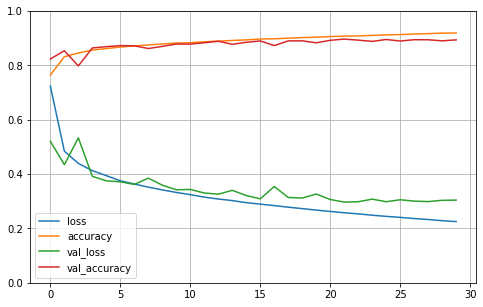

In [26]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [27]:
#Evaluating
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3384 - accuracy: 0.8830


[0.3383956849575043, 0.8830000162124634]

In [28]:
x_new=x_test[:3]

In [29]:
y_proba=model.predict(x_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred=model.predict_classes(x_new)
y_pred

AttributeError: 'Sequential' object has no attribute 'predict_classes'

AxesImage(54,36;334.8x217.44)


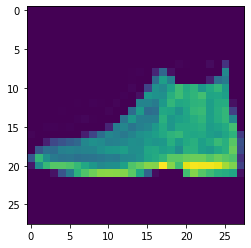

In [35]:
print(plt.imshow(x_test[0]))